In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import itertools


In [2]:
##load the collected results
general_grid_search_result_df_learned = pd.read_csv("D:/result_mri_experiment/general_grid_search_result_df_learned.csv", sep ="\t")
general_grid_search_result_df_fixed = pd.read_csv("D:/result_mri_experiment/general_grid_search_result_df_fixed.csv", sep ="\t")

best_result_df_learned = pd.read_csv("D:/result_mri_experiment/best_result_df_learned.csv", sep ="\t")
best_result_df_fixed = pd.read_csv("D:/result_mri_experiment/best_result_df_fixed.csv", sep ="\t")




In [4]:
##remove column where there are unnamed0...
r = re.compile("Unnamed.*") 

for df in [general_grid_search_result_df_learned, general_grid_search_result_df_fixed, best_result_df_learned, best_result_df_fixed]:
    
    newlist = list(filter(r.match, df.columns)) # Read Note
    
    df.drop(newlist, inplace=True, axis=1)

# <font color='darkblue'> Analyse learned mask result

In [6]:
general_grid_search_result_df_learned.head()


,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,"[121, 145]",square,0.125,1,"[11, 11]",0.0175,0.010,0.0001,0.615953,22.267923,0.072610,2.310962e-09
1,"[121, 145]",no,0.125,1,"[11, 11]",0.0175,0.001,0.0100,0.476863,17.680638,0.176394,6.299534e-09
2,"[121, 145]",no,0.125,1,"[11, 11]",0.0175,0.010,0.0001,0.314183,16.057201,0.344214,1.209705e-08
3,"[121, 145]",no,0.125,1,"[11, 11]",0.0175,0.001,0.0010,0.647924,24.931016,0.046984,1.349451e-09
4,"[121, 145]",square,0.125,1,"[11, 11]",0.0175,0.010,0.0010,0.675561,25.251880,0.044530,1.311514e-09


In [8]:
best_result_df_learned.head()

,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,"[4, 4]",square,0.125,1,"[11, 11]",0.0175,0.010,0.0100,1.0,inf,0.0,0.0
1,"[4, 4]",square,0.125,1,"[11, 11]",0.0175,0.010,0.0010,1.0,inf,0.0,0.0
2,"[4, 4]",square,0.125,1,"[11, 11]",0.0175,0.001,0.0100,1.0,inf,0.0,0.0
3,"[4, 4]",square,0.125,1,"[11, 11]",0.0175,0.010,0.0001,1.0,inf,0.0,0.0
4,"[4, 4]",square,0.125,1,"[11, 11]",0.0175,0.001,0.0010,1.0,inf,0.0,0.0


In [9]:
len(general_grid_search_result_df_learned)

660

In [10]:
general_grid_search_result_df_learned.isnull().values.any()

False

In [23]:
general_grid_search_result_df_fixed.head()

,acs_type,mask_typ,mask_seed,mask_dim,bloc,kernel,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
0,no,caipiranha,42083,"[4, 4]",1,"[13, 13]",0.010,0.985945,47.768835,0.001263,1.170915e-11
1,no,caipiranha,42083,"[4, 4]",1,"[11, 11]",0.010,0.985135,46.723226,0.001165,1.277807e-11
2,square,caipiranha,42083,"[4, 4]",1,"[13, 13]",0.010,0.929553,40.102094,0.003501,5.314355e-11
3,square,caipiranha,42083,"[4, 4]",1,"[11, 11]",0.010,0.931190,41.470164,0.002750,4.776669e-11
4,no,caipiranha,42083,"[4, 4]",1,"[11, 11]",0.001,0.991499,47.719265,0.000606,8.804585e-12


In [21]:
len(general_grid_search_result_df_fixed)

778

In [22]:
general_grid_search_result_df_fixed.isnull().values.any()

False

### boxplot_for each hyperparam


In [11]:
def boxplot_hyper_single(df, hyperparam, metrics):
    
    for hyp in hyperparam:
    
        plt.figure()
        
        if len(metrics)>1:
            fig, ax = plt.subplots(1,3,figsize=(10,8))
            for i in range(len(metrics)):
                df.boxplot(column=metrics[i], by = hyp,ax = ax[i])
        
        else :
            fig, ax = plt.subplots(1,1,figsize=(5,4))
            df.boxplot(column=metrics, by = hyp,ax = ax) 



C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

<Figure size 432x288 with 0 Axes>

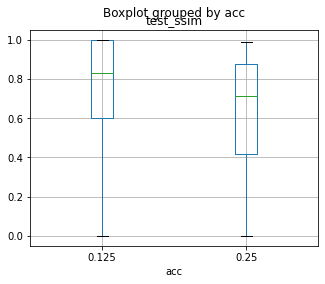

<Figure size 432x288 with 0 Axes>

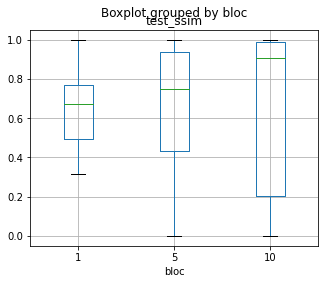

<Figure size 432x288 with 0 Axes>

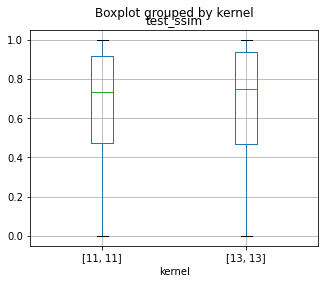

<Figure size 432x288 with 0 Axes>

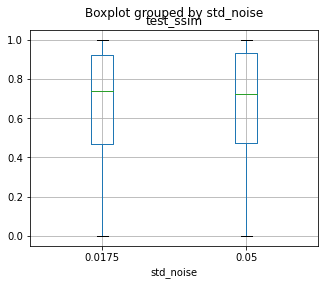

<Figure size 432x288 with 0 Axes>

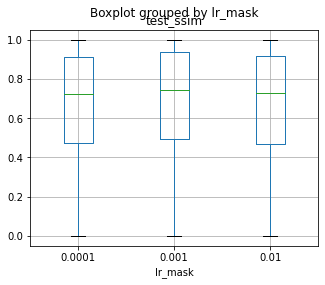

<Figure size 432x288 with 0 Axes>

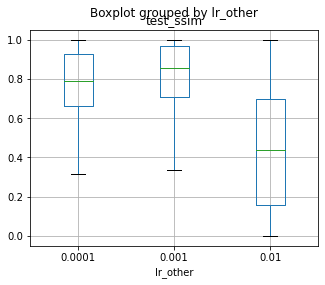

In [12]:
boxplot_hyper_single(general_grid_search_result_df_learned, 
                     hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                     metrics=["test_ssim"])

### boxplot_hyper_pair


In [13]:
def boxplot_hyper_pair(df, hyperparam, metrics, figsize =(10,6) ):
    
    for pair in itertools.combinations(hyperparam, r=2):
    #print(list(pair))
        
        if len(metrics)>1:
            fig, ax = plt.subplots(len(metrics),1,figsize=(20,18))
            for i in range(len(metrics)):
                df.boxplot(column=metrics[i], by = list(pair),ax = ax[i])
        else :
            fig, ax = plt.subplots(len(metrics),1,figsize=figsize)
            #ax.set_ylim([0, 0.25])
            df.boxplot(column=metrics, by = list(pair),ax = ax)
        
        return ax

#https://stackoverflow.com/questions/942543/operation-on-every-pair-of-element-in-a-list            

C:\Users\jeane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


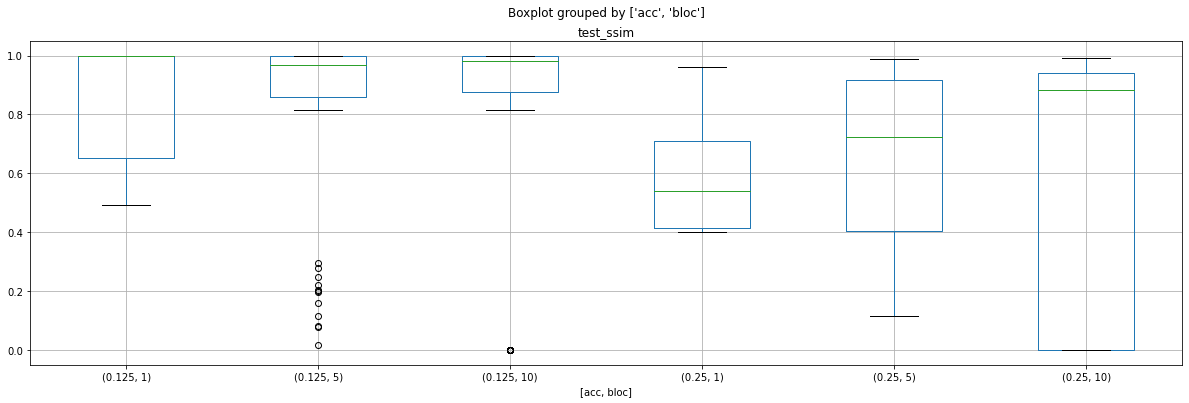

In [14]:
boxplot_hyper_pair(general_grid_search_result_df_learned.query('mask_dim == "[4, 4]"'), 
                   hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                   metrics = ["test_ssim"],figsize =(20,6) )

ValueError: not enough values to unpack (expected 2, got 0)

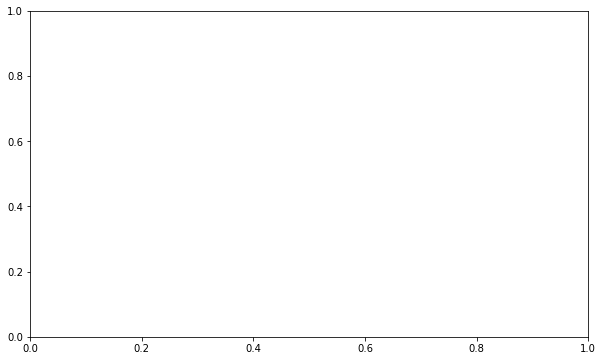

In [15]:
boxplot_hyper_pair(general_grid_search_result_df_learned.query('mask_dim == "[28, 28]"'), 
                   hyperparam=['acc','bloc','kernel','std_noise','lr_mask','lr_other'], 
                   metrics = ["test_ssim"])

### best models in terms of mse


In [17]:
def best_mse_per_hyperparam(dataframe,*argv):
    
    hyperparam = [arg for arg in argv]
    
    idx = dataframe.groupby(hyperparam)['test_loss'].transform(min) == dataframe['test_loss']
    
    best_result_df = dataframe[idx]
    
    #best_result_df[[var1,var2]] = best_result_df[['bloc','acc']]#.astype(int)        
    
    best_result_df.sort_values(by = hyperparam,inplace = True)

    #best_result_df.to_csv("./extracted_result/best_mse_per_bloc_k_local.csv", sep='\t') 

    return best_result_df

#best_mse_per_hyperparam(general_grid_search_result_df_learned,'bloc','acc')



In [18]:
experiment_mri_no_acs = general_grid_search_result_df_learned[general_grid_search_result_df_learned['acs_type']=="no"]

In [19]:
best_mse_per_hyperparam(experiment_mri_no_acs.query('mask_dim=="[121, 145]"'),'acc')


<ipython-input-17-bbeda66db735>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
77,"[121, 145]",no,0.125,5,"[11, 11]",0.0175,0.001,0.001,0.868612,30.250434,0.016960,4.949566e-10
211,"[121, 145]",no,0.250,5,"[11, 11]",0.0500,0.001,0.001,0.939971,36.982352,0.004709,1.126549e-10


In [20]:
best_mse_per_hyperparam(experiment_mri_no_acs.query('mask_dim=="[4, 4]"'),'acc')

<ipython-input-17-bbeda66db735>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
409,"[4, 4]",no,0.125,10,"[13, 13]",0.0175,0.01,0.001,0.965685,39.806023,0.002457,5.076034e-11
592,"[4, 4]",no,0.250,10,"[11, 11]",0.0175,0.01,0.001,0.990369,45.880555,0.000696,1.175845e-11


In [26]:
experiment_mri_fixed_no_acs =  general_grid_search_result_df_fixed[general_grid_search_result_df_fixed['acs_type']=="no"]
best_mse_per_hyperparam(experiment_mri_fixed_no_acs,'mask_typ')


<ipython-input-17-bbeda66db735>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,acs_type,mask_typ,mask_seed,mask_dim,bloc,kernel,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
38,no,2D_uniform,71825,"[4, 4]",10,"[11, 11]",0.0001,0.989384,49.808584,0.000673,6.514534e-12
9,no,caipiranha,42083,"[4, 4]",5,"[11, 11]",0.0010,0.994529,52.658104,0.000265,3.272324e-12
361,no,random,91329,"[4, 4]",10,"[11, 11]",0.0010,0.993230,50.660711,0.000341,4.490390e-12
42,no,uniform,99535,"[4, 4]",5,"[11, 11]",0.0010,0.989852,46.569153,0.000688,1.368443e-11


In [ ]:
###order suivant SSIM

In [30]:
experiment_mri_no_acs.query('mask_dim=="[121, 145]"').sort_values(by=['test_ssim'], ascending=False)

,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
211,"[121, 145]",no,0.250,5,"[11, 11]",0.0500,0.0010,0.001,0.939971,36.982352,0.004709,1.126549e-10
194,"[121, 145]",no,0.250,5,"[11, 11]",0.0175,0.0010,0.001,0.902885,32.932598,0.009229,2.469978e-10
77,"[121, 145]",no,0.125,5,"[11, 11]",0.0175,0.0010,0.001,0.868612,30.250434,0.016960,4.949566e-10
92,"[121, 145]",no,0.125,5,"[11, 11]",0.0500,0.0010,0.001,0.858128,29.933789,0.018126,5.506723e-10
237,"[121, 145]",no,0.250,5,"[13, 13]",0.0175,0.0001,0.001,0.855505,33.648153,0.007694,1.649245e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
89,"[121, 145]",no,0.125,5,"[11, 11]",0.0500,0.0100,0.010,0.112068,7.947941,2.832172,4.727055e-08
102,"[121, 145]",no,0.125,5,"[13, 13]",0.0175,0.0100,0.010,0.071005,7.950219,2.527750,4.552885e-08
223,"[121, 145]",no,0.250,5,"[13, 13]",0.0175,0.0100,0.010,0.060631,4.520269,4.652281,1.026227e-07
115,"[121, 145]",no,0.125,5,"[13, 13]",0.0175,0.0010,0.010,0.012502,-2.805350,11.732242,3.074255e-07


In [ ]:
############################### NE PAS CONSIDER

In [28]:
experiment_mri_yes_acs = general_grid_search_result_df_learned[general_grid_search_result_df_learned['acs_type']=="square"]
best_mse_per_hyperparam(experiment_mri_yes_acs.query('mask_dim=="[121, 145]"'),'acc')

<ipython-input-17-bbeda66db735>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result_df.sort_values(by = hyperparam,inplace = True)


,mask_dim,acs_type,acc,bloc,kernel,std_noise,lr_mask,lr_other,test_ssim,test_psnr,test_loss,test_loss_denorm
71,"[121, 145]",square,0.125,5,"[11, 11]",0.0175,0.001,0.001,0.904173,34.123872,0.009544,2.706457e-10
220,"[121, 145]",square,0.250,5,"[11, 11]",0.0500,0.001,0.001,0.983663,42.322832,0.000875,2.176515e-11
